In [79]:
import pandas as pd
import yfinance as yf

# Download historical data
tckr = str(input("Enter your Ticker: "))
tckr = tckr.upper()
df = yf.download(tckr, start='2020-01-01', end='2025-12-31')

# Keep relevant columns
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

[*********************100%***********************]  1 of 1 completed


In [80]:
# Shift 'High' to create the next day's price as the target
df['Next_High'] = df['High'].shift(-1).fillna(0)

# Define features (X) and target (y)
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Next_High']

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [82]:
df['Predicted_High'] = model.predict(X)

Mean Squared Error: 43.01


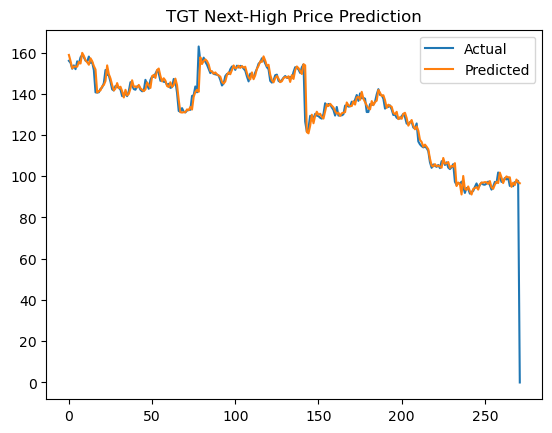

In [83]:
import matplotlib.pyplot as plt

# Calculate error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plot actual vs. predicted
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title(f'{tckr} Next-High Price Prediction')
plt.legend()
plt.show()

In [84]:
y_test

Date
2024-04-29    155.985488
2024-04-30    155.026329
2024-05-01    152.158503
2024-05-02    153.760252
2024-05-03    151.928301
                 ...    
2025-05-22     95.180000
2025-05-23     97.129997
2025-05-27     97.089996
2025-05-28     97.769997
2025-05-29      0.000000
Name: Next_High, Length: 272, dtype: float64

In [85]:
y_pred

array([158.83146359, 155.83080401, 152.33751788, 153.19116942,
       153.19331084, 153.14243547, 155.44740472, 154.6778475 ,
       159.84327358, 158.35743407, 156.20623989, 155.27211685,
       154.07163995, 157.20793093, 155.81864848, 153.48371845,
       151.77174982, 140.58238288, 141.31284424, 141.64116001,
       143.67271593, 144.24103251, 146.23116424, 153.76259595,
       149.52423142, 147.42865598, 144.24582553, 141.61971948,
       142.53648323, 145.17991136, 142.70054273, 143.40834508,
       141.27098492, 138.20376087, 141.9222582 , 139.22399272,
       139.89914236, 142.57099177, 146.55197763, 143.37670964,
       143.57957115, 143.03191933, 144.3003445 , 142.65770825,
       142.00381776, 141.28681764, 142.10549412, 145.51092668,
       144.16402847, 142.82260507, 148.45851869, 149.18051196,
       147.68208156, 151.50980832, 152.23439605, 148.68344895,
       146.01666264, 147.51399774, 146.39884019, 143.75595175,
       143.26502897, 145.58650661, 143.3252761 , 144.16

In [86]:
df

Price,Open,High,Low,Close,Volume,Next_High,Predicted_High
Ticker,TGT,TGT,TGT,TGT,TGT,,
Date,,,,,,,
2020-01-02,112.422797,112.562507,109.383868,110.091202,5149800,109.619646,111.778828
2020-01-03,108.859919,109.619646,108.222440,108.947243,5018500,108.851191,110.203078
2020-01-06,108.257378,108.851191,107.602437,107.916809,4226900,108.659058,109.169035
2020-01-07,107.410303,108.659058,107.410303,108.108910,3641600,109.375140,109.390323
2020-01-08,108.327237,109.375140,107.707221,107.759621,5731600,109.078216,109.155081
...,...,...,...,...,...,...,...
2025-05-22,92.169998,95.820000,92.050003,95.059998,11428000,95.180000,96.878942
2025-05-23,93.139999,95.180000,93.139999,94.290001,7373800,97.129997,95.746939
